In [34]:
#!/usr/bin/python

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

# observed shower
# /lsdf/auger/corsika/napoli/QGSJET-II.04/proton/18.5_19/DAT784868.lst

# E = 8.54718e+09

plt.rcParams["figure.figsize"] = [40, 20]
plt.rcParams["font.size"] = 30

In [15]:
# Observed

with open('Auger_051035232600.json', "r") as file_content:  
    data = json.load(file_content)

eyes = pd.DataFrame(data['eyes'])
fdrec = pd.DataFrame(data['fdrec'])
sdrec = pd.DataFrame(data['sdrec'])

observed_energy = np.unique(sdrec['energy'])[0]

#######

for idx, eye in eyes.merge(fdrec, how='inner').iterrows():
        L = eye.uspL
        R = eye.uspR
        Xmax = eye.xmax
        dEdXmax = eye.dEdXmax
        factor = 5 * 10**8

        atm_fields = ["atmDepthProf", "energyDepositProf", "denergyDepositProf"]
        profile = pd.DataFrame(dict(zip(atm_fields, eye[atm_fields])))

        depth_observed, observed = profile.atmDepthProf, dEdXmax*pow(1 + R*(profile.atmDepthProf-Xmax)/L, pow(R,-2)) * np.exp(-(profile.atmDepthProf-Xmax) / (R*L)) * factor
        measurements, measurements_err = profile.energyDepositProf * factor, profile.denergyDepositProf * factor

In [24]:
# Simulated

depth_simulated, GAMMAS, POSITRONS, ELECTRONS, MUp, MUm, HADRONS, CHARGED, NUCLEI, CHERENKOV = np.loadtxt("gammas.txt", unpack = True)
simulated = CHARGED

In [17]:
# Heitler-Matthews

depth_deterministic, nuclei, pions, electrons, photons, muons, neutrinos, remainin_energy, ionization = np.loadtxt('./showersim/result_deterministic.txt', unpack=True)
heitler_matthews_deterministic = nuclei + pions + electrons + photons + muons

In [18]:
# Heitler-Matthews + stochastic component

depth_stochastic, nuclei, pions, electrons, photons, muons, neutrinos, remainin_energy, ionization = np.loadtxt('./showersim/result_random.txt', unpack=True)
heitler_matthews_stochastic = nuclei + pions + electrons + photons + muons


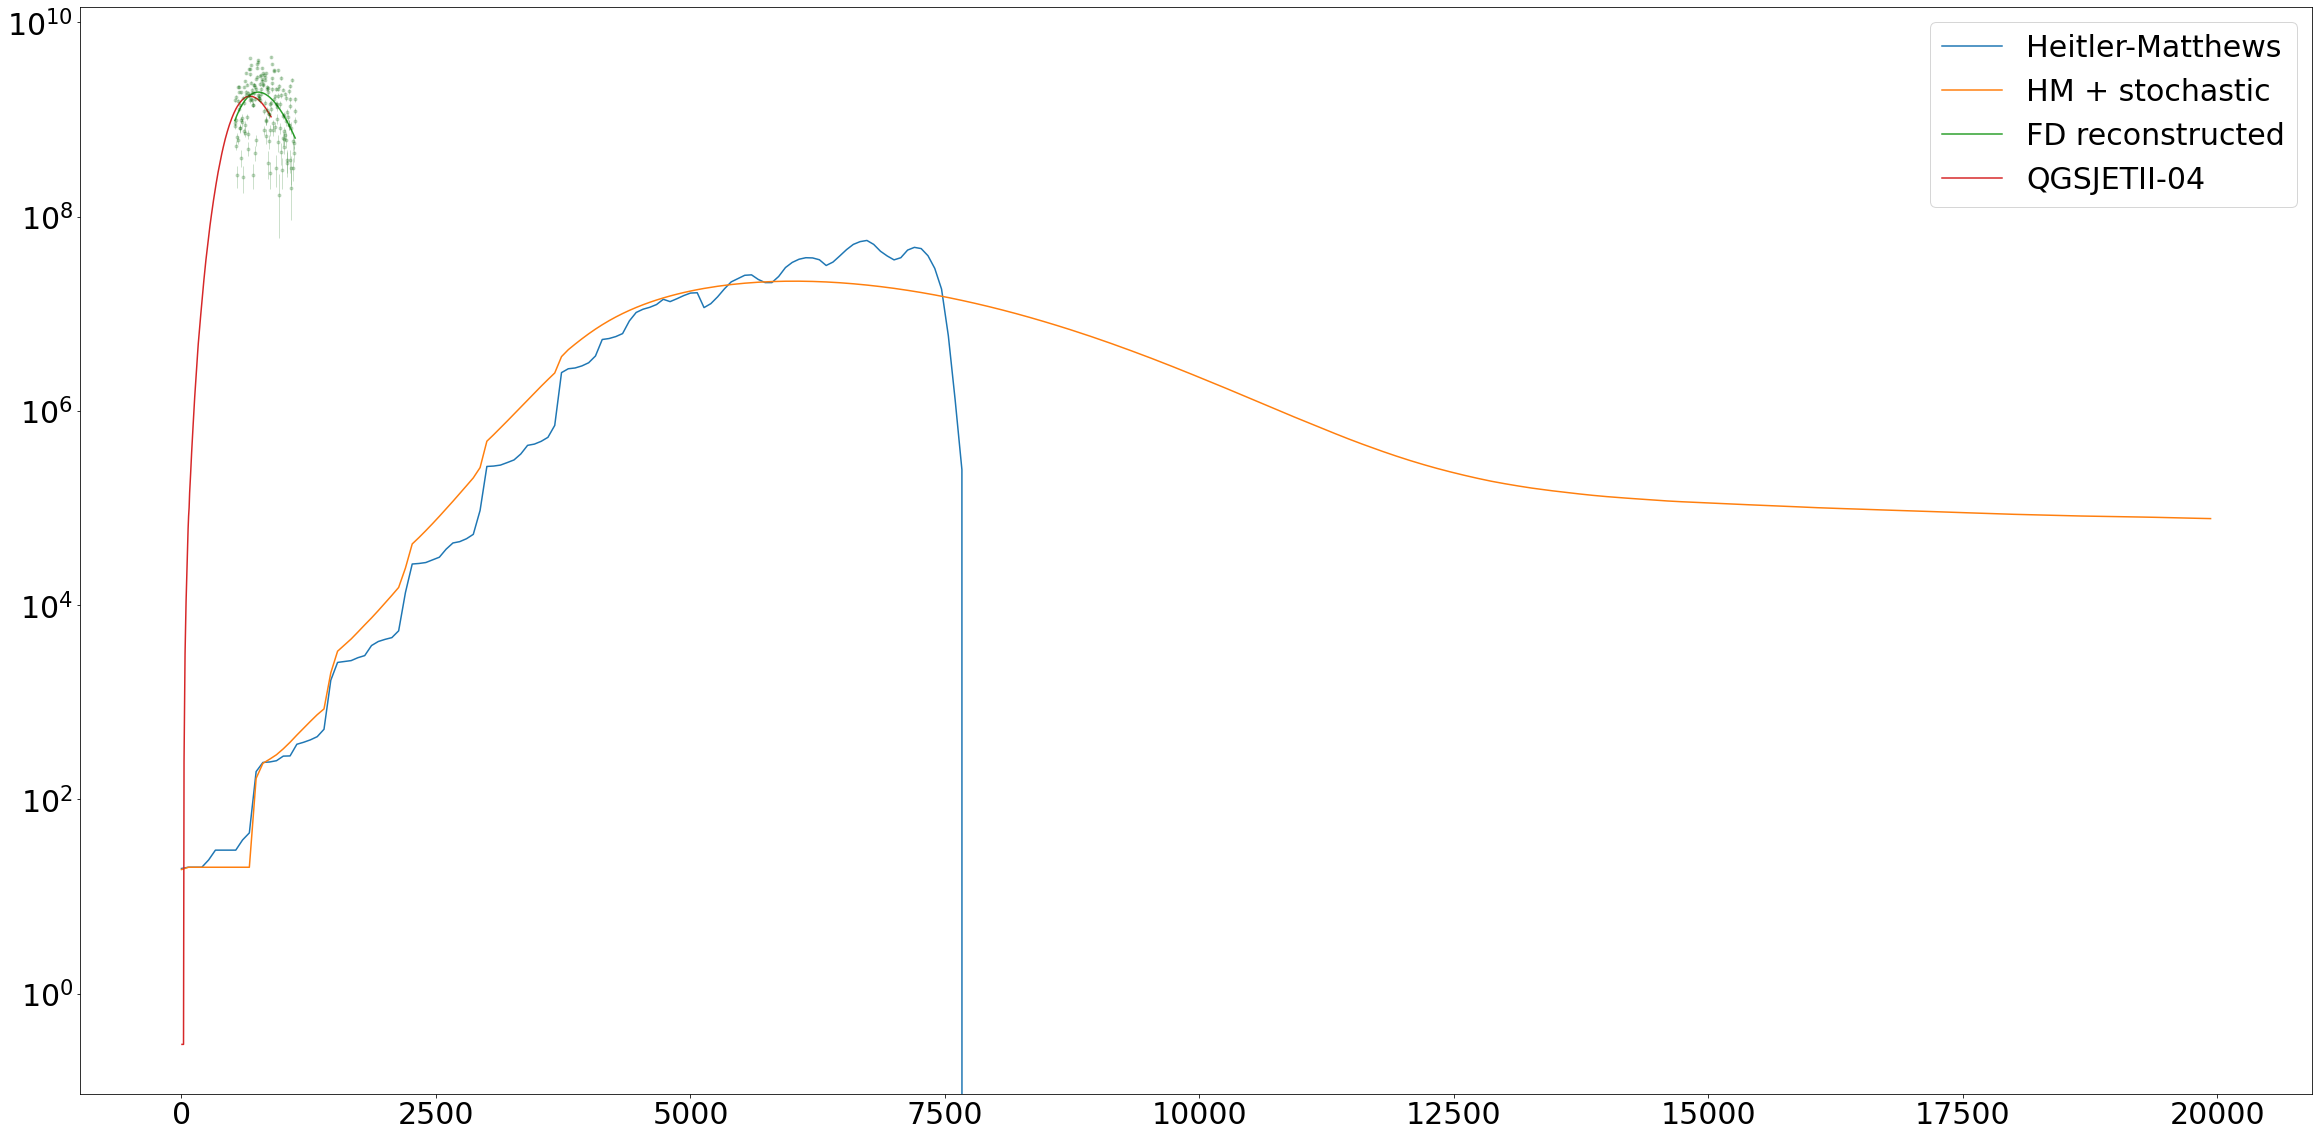

In [47]:

plt.plot(depth_deterministic, heitler_matthews_deterministic, label = "Heitler-Matthews")
plt.plot(depth_stochastic, heitler_matthews_stochastic, label = "HM + stochastic")
plt.plot(depth_observed, observed, label ="FD reconstructed", zorder = 1)
plt.plot(depth_simulated, simulated * 0.3, label = "QGSJETII-04")
plt.errorbar(depth_observed[measurements > 10**8], measurements[measurements > 10**8], yerr = measurements_err[measurements > 10**8] / 10, linestyle='', marker='o', alpha=0.2, markersize=3, linewidth=1, c = "darkgreen")

plt.yscale("log")
plt.legend()

In [48]:
print(observed_energy)

1.845
